## Telephony Customers Prodiction Modeling by K-Nearest Neighbors

### Description:
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups: opt for Plus Services, Basic-services, Total Services, and E-Services. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case. such as region, age, and marital, to predict usage patterns. Our objective is to build a classifier to predict the service category for unknown cases. We will use a specific type of classification called K-nearest neighbors.

### Objectives

For this project we will:

*   Use K-Nearest neighbors to classify data


### Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Load and Read the Data

In [3]:
df = pd.read_csv("tele_cust_KNN.csv")
print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


Let us first look at the class-wise distribution of the data set

In [4]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

We can say that we have records of 281 customers who opt for Plus Services, 266 for Basic-services, 236 for Total Services, and 217 for E-Services. It can thus be seen that the data set is mostly balanced between the different classes and requires no special means of accounting for class bias. Next, let us visualize the correlation map of the data set to determine how the different features are related to each other.

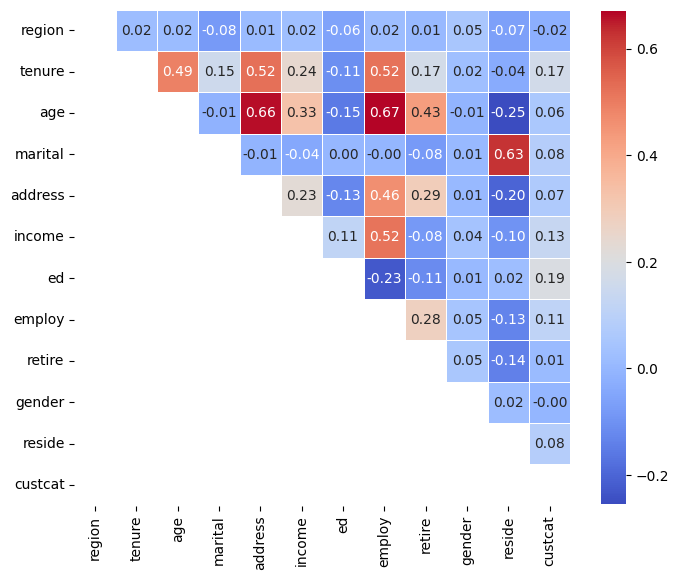

In [11]:
corr = df.corr()

# mask lower triangle + diagonal
mask = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 8))
sns.heatmap(
    corr,
    mask=mask,          # hide lower tri + diagonal
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8}
)
plt.show()

As is visible from the correlation map, some features have better correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. custcat with all the other features. This will help us identify which features should be focussed on for modeling and which ones can be ignored. The following code snippet will give us a list of features sorted in the descending order of their absolute correlation values with respect to the target field.

In [12]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

This shows us that the features retire and gender have the least effect on custcat while ed and tenure have the most effect.

### Normalize Data

Now we can separate the data into the input data set and the target data set. By normalizing / standardizing the data, we can ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range). 

In [13]:
X = df.drop('custcat',axis=1)
y = df['custcat']

X_norm = StandardScaler().fit_transform(X)

Now we should separate the training and the testing data. We can retain 20% of the data for testing purposes and use the rest for training. Assigning a random state ensures reproducibility of the results across multiple executions.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

### KNN Classification

K in KNN, is the number of nearest neighbors to examine. However, the choice of the value of 'k' clearly affects the model. Therefore, the appropriate choice of the value of the variable k becomes an important task. The general way of doing this is to train the model on a set of different values of k and noting the performance of the trained model on the testing set. The model with the best value of accuracy_score is the one with the ideal value of the parameter k. Check the performance of the model for 30 values of k, ranging from 1-30. We can evaluate the accuracy along with the standard deviation of the accuracy as well to get a holistic picture of the model performance.

Best K = 38, Test Accuracy = 0.410


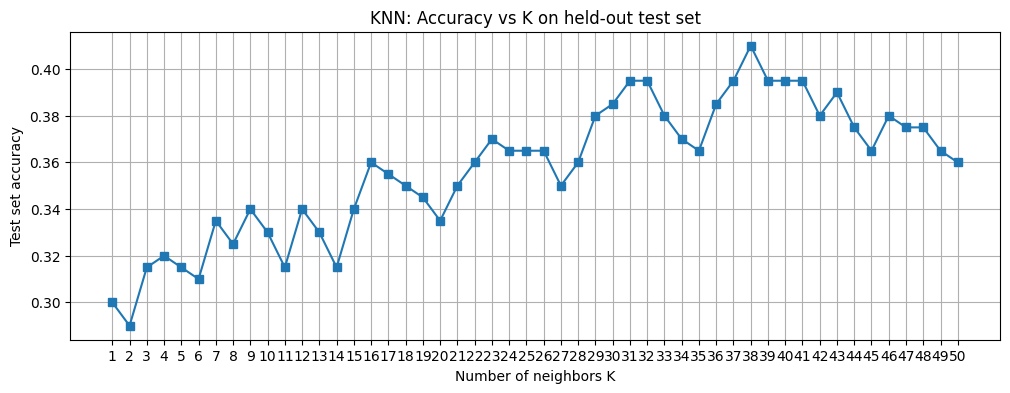

In [21]:
ks = range(1,51)
scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    scores.append(accuracy_score(y_test, yhat))

# Find best K
best_k = ks[scores.index(max(scores))]
best_score = max(scores)
print(f"Best K = {best_k}, Test Accuracy = {best_score:.3f}")

# Plot the Chart
plt.figure(figsize=(12,4))
plt.plot(ks, scores, marker='s')
plt.xlabel('Number of neighbors K')
plt.ylabel('Test set accuracy')
plt.title('KNN: Accuracy vs K on held-out test set')
plt.xticks(ks)
plt.grid(True)
plt.show()

When k is small (e.g., k=1), the model is highly sensitive to the individual points in the dataset (score:0.3). The prediction for each point is based on its closest neighbor, which can lead to highly specific and flexible boundaries. This leads to overfitting on the training data, meaning the model will perform very well on the training set, potentially achieving 100% accuracy. However, it may generalize poorly to unseen data. When k is large, the model starts to take into account more neighbors when making predictions. 

If we smooth the Decision Boundary, then it means the model is less sensitive to the noise or fluctuations in the training data. With a larger k, the model considers more neighbors and therefore makes more generalized predictions, which can lead to fewer instances being classified perfectly.

As a result, the model starts to become less flexible, and its ability to memorize the training data (which can lead to perfect accuracy with small k) is reduced. As we see above, the best K is 38.

### Conclusion:

Even with optimized hyper-parameters (best K, distance weighting, etc.), our KNN classifier only achieves a test accuracy of 0.410, which suggests it’s struggling on this dataset. This weak performance can be attributed to several factors:

* Dependence on raw feature space.
KNN makes no internal transformations or learning of feature representations. If the original variables don’t clearly separate customer classes, the model has no mechanism to compensate.

* Curse of dimensionality.
As the number of (weakly correlated) features grows, all points tend to become equidistant, eroding KNN’s ability to discriminate between classes.

* Uniform feature weighting.
KNN treats every feature as equally important when computing distances—irrelevant or noisy features thus dilute the signal coming from the truly informative ones.

Next steps:

* Feature engineering or selection (e.g. via univariate tests or tree-based importances) to retain only the most predictive variables.

* Dimensionality reduction (PCA or manifold methods) to concentrate the class-separating information.

* Alternative algorithms (e.g. logistic regression, random forests) that can learn feature weights or non-linear decision boundaries.